

# Build Lab 2a Derive Investor Risk Tolerance

The goal of Build Lab 2a is derive the risk tolerance, or risk aversion, of an investor


## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)


<a id='0'></a>
# 1. Problem Definition

In the supervised regression framework used for this case study, the predicted variable
is the “true” risk tolerance of an individual10 and the predictor variables are demo‐
graphic, financial and behavioral attributes of an individual

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve
Board. The data source is : 
https://www.federalreserve.gov/econres/scf_2009p.htm

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# First steps - Build Lab 2a

# Load core libraries so Jupyter Notebook can run Buld Lab 2a in the Binder virtual environment

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy 
import os
from sklearn.preprocessing import StandardScaler

# Add libraries containing basic statistical methods

import statsmodels.api as sm

# Add lbraries to save the variables, models, and results produced by the Python code in this Jupyter Notebook

from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# Load panel dataset of investor characteristics

os.chdir('../Data files for all Build Labs')
dataset = pd.read_excel('SCFP2009panel.xlsx')
os.chdir('../Build Lab 2a/')

In [90]:
# Disable unused warning messages

import warnings
warnings.filterwarnings('ignore')

In [91]:
type(dataset)

pandas.core.frame.DataFrame

In [92]:
dataset.shape

(19285, 521)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable

The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis). 

We prepare the predicted variable, which is the "true" risk tolerance in the following steps. There are different ways of getting the "true" risk tolerance. The idea and the purpose of this case study is to come up with an approach to solve the behavioral finance problem using machine learning. 

The steps to compute the predicted variables are as follows: 

1) Compute the Risky asset and the riskless assets for all the individuals in the survey data. Risky and riskless assets are defined as follows: 
* **Risky assets** is investments in mutual funds, stocks, bonds, commodities, and
real estate, and an estimate of human capital. 
* **Risk Free Assets**: checking and savings balances,certificates of deposit, and other cash balances and equivalents.

2) We take the ratio of risky assets to total assets of an investor and consider that as a measure of risk tolerance of an investor. From the data of SCF, we have the data of risky and riskless assets for the individuals for 2007 and 2009. We use this data and normalise the risky assets with the stock price of 2007 vs. 2009 to get risk tolerance. 

* **Risk Tolerance**  just defined as the ratio of Risky Asset to Riskless Assets normalised with the average S&P500 of 2007 vs 2009. 
Average S&P500 in 2007: 1478
Average S&P500 in 2009: 948

3) In a lot of literature, an intelligent investor is the one who doesn't change its risk tolerance during the change in the market. So, we consider the investors who change their risk tolerance by less than 10% between 2007 and 2009 as the intelligent investors. Ofcourse this is a qualitative judgement and is subject to change. However, as mentioned before more than being accurate and precise the purpose of theis case study is to demonstrate the usage of the machine learning and provide a machine learning based framework in behavioral finance and portfolio management which can be further leveraged for more detailed analysis. 

In [93]:
# Derive averages for SP500 during 2007 and 2009

Average_SP500_2007=1478
Average_SP500_2009=948

# Risk Tolerance 2007
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] 
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

# Risk Tolerance 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] 
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

In [94]:
dataset2 = copy.deepcopy(dataset)  
dataset2.head(n=10)

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RT07,RiskFree09,Risky09,RT09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.000000e+00,0.000000,16000,17000,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.000000e+00,0.000000,19000,18000,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.000000e+00,0.000000,13000,12000,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.000000e+00,0.000000,25000,13000,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.000000e+00,0.000000,17000,12000,0.265410
5,2,21,255.421402,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,337604.833440,1.387701e+06,0.804322,230000,350000,0.387056
6,2,22,265.151248,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,337604.833440,1.480905e+06,0.814351,230000,350000,0.387056
7,2,23,254.044527,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,337604.833440,1.164012e+06,0.775172,230000,350000,0.387056
8,2,24,252.877840,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,337604.833440,2.489577e+06,0.880586,230000,350000,0.387056
9,2,25,245.023339,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,337604.833440,1.862005e+06,0.846516,230000,350000,0.387056


Now we compute the percentage change in risk tolerance between 2007 and 2009. 

In [95]:
dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

Checking for rows with null or N/A values. Remove them.

In [96]:
#Checking for any null values and removing the null values'''

print('Null Values =',dataset2.isnull().values.any())

Null Values = True


In [98]:
# Drop rows containing NA
dataset2=dataset2.dropna()

dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

#Check for any "null values" and remove null "values"
print('Null Values =',dataset2.isnull().values.any())

Null Values = False


In [99]:
# Now plot the risk tolerance for both 2007 and 2009. 

<Axes: xlabel='RT07'>

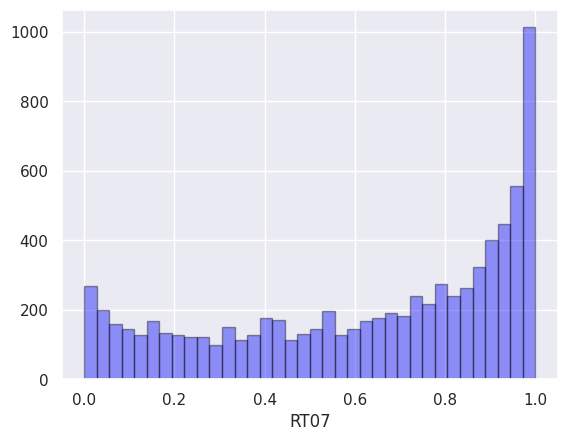

In [101]:
sns.set()
# sns.distplot(dataset2['RT07'])
# sns.histplot(data = dataset2, x = 'RT07')
sns.distplot(dataset2['RT07'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

# penguins = sns.load_dataset(dataset2)
# sns.histplot(data=dataset2, x="RT07")
# sns.histplot(data=dataset2, x=dataset2['RT07'])

# x sns.histplot(data = dataset2['RT07'])
# sns.histplot(dataset2['RT07'], x = 'RT07')

# sns.histplot(x = 'RT07', data = dataset2)

# sns.histplot(dataset2['RT07'])

# sns.histplot(data = dataset2, x = 'RT07')

# sns.histplot(dataset2['RT07'], hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})

# sns.load_dataset(dataset2)
# sns.histplot(data = dataset2, x="RT07", hist=True, kde=False, 
#            bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})

The graph of investor's risk tolerance in 2007 shows that a significant number of individuals had risk tolerance close to one. This means the investments were skewed towards riskier rather than riskless assets. Now we derive and graph risk tolerance for 2009.

<Axes: xlabel='RT09'>

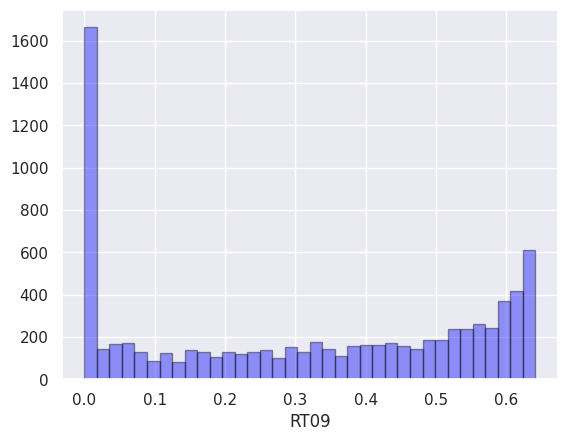

In [102]:
sns.distplot(dataset2['RT09'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [103]:
dataset3 = copy.deepcopy(dataset2)  

The behavior of investors reversed after the 2009 crisis and the majority of investment was reallocated to risk free assets. Overall risk tolerance decreased, which is shown by majority of risk tolerance being close to 0 in 2009. 

Next we select the investors with high risk tolerance. Their investments changed less than 10% between 2007 and 2009.

In [104]:
dataset3 = dataset3[dataset3['PercentageChange']<=.1]

Derive the investor's risk tolerance by taking the investor's average risk tolerance between 2007 and 2009. This is the predicted variable used in Buiild Lab 2a. It is used to predict the risk tolerance of an investor using features for demographic, financial and risk tolerance. 

In [105]:
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

In [106]:
# Drop labels which might not be needed for the statistical prediction:
    
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

<a id='2.2.2'></a>
### 3.2.2.  Features elimination

# In order to filter the features further:

1. Check the description in the Data Dictionary (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt)

2. Review the descriptions in the Data Dictionary. Select the features (variables) that are intuitive drivers of risk aversion from the list below: 

    * AGE: Age classiified in 6 categories, where 1 is an age <35 and 6 is an age >75.
    * EDUC: Education classified at 4 levels, where 1 is "no high school" and 4 is "college degree."
    * MARRIED: Marital status. where 1 represents married and 2 represents unmarried. 
    * OCCU: Investor's occupation. 1 represents working in managerial position and 4 is unemployed.
    * KIDS: Number of children (kids). 
    * NWCAT: Net worth divided into 5 levels, where 1 is a net worth <25th percentile and 5 is a net worth >=90th percentile. 
    * INCCL: Income divided into 5 levels, where 1 is a income <10,000 and 5 is a net worth >100,000
    * RISK: Risk tolerance on a scale of 1 to 4, where 1 is the highest level of investor risk tolerance. 

3. Keep only the intuitive factors as of 2007 only and remove all the intermediate features and features related to 2009, as the variables of 2007 are the only ones required for predicting the risk tolerance.


In [107]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

<Axes: title={'center': 'Correlation Matrix'}>

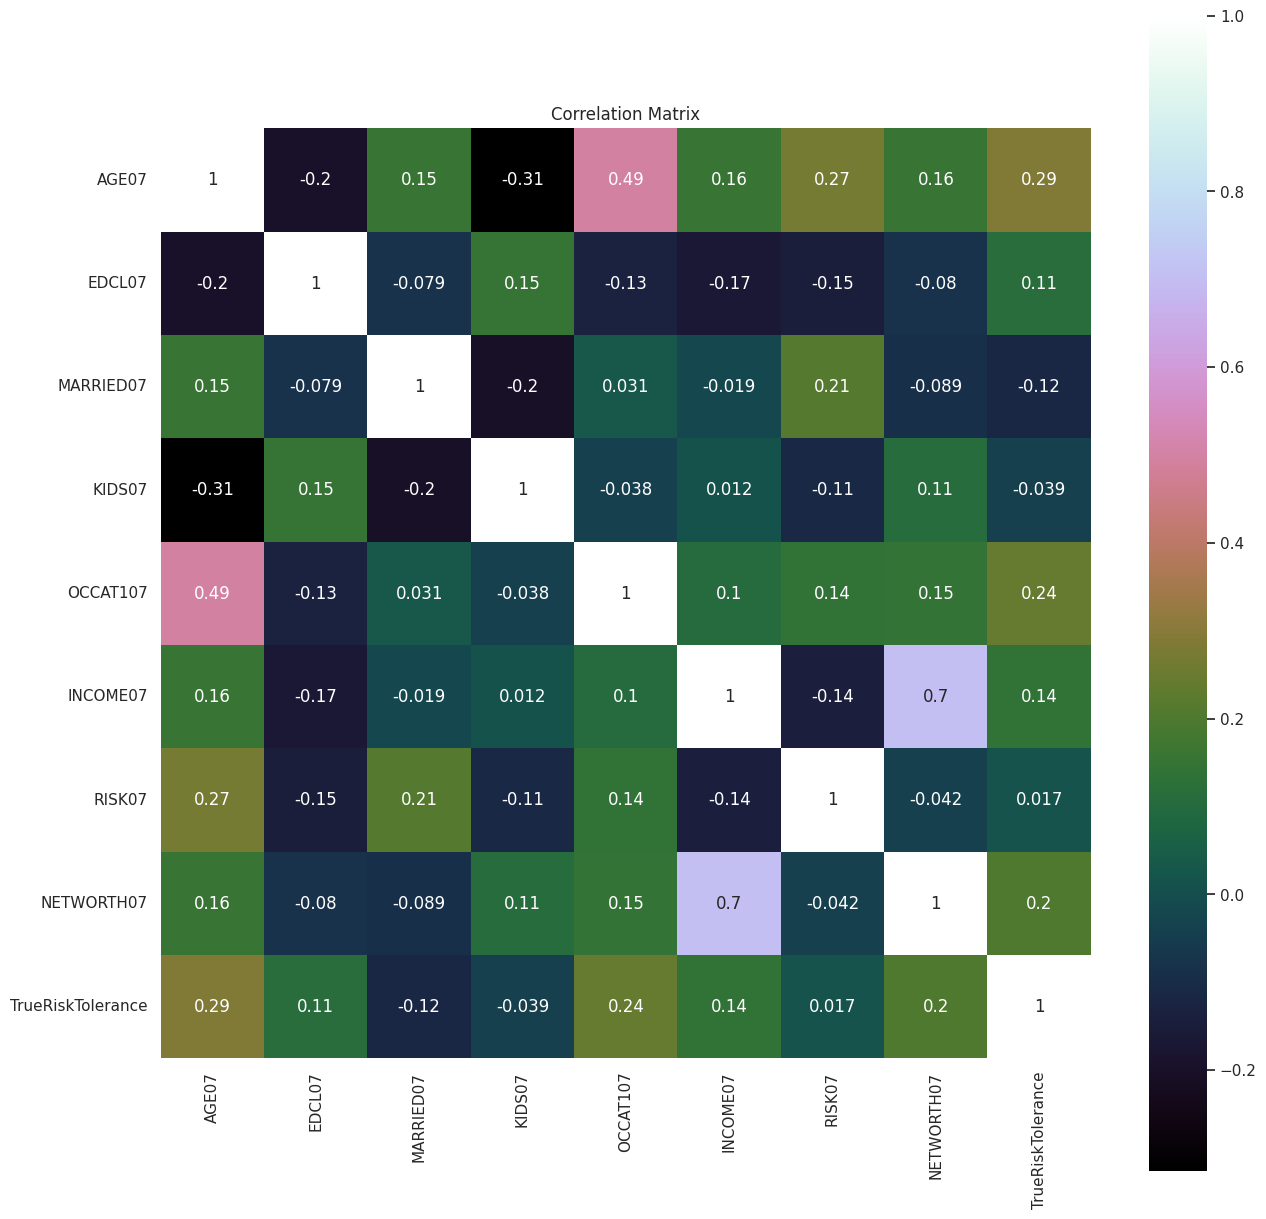

In [108]:
# Next calculate the statistical correlations (relationships) between the variables

correlation = dataset3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

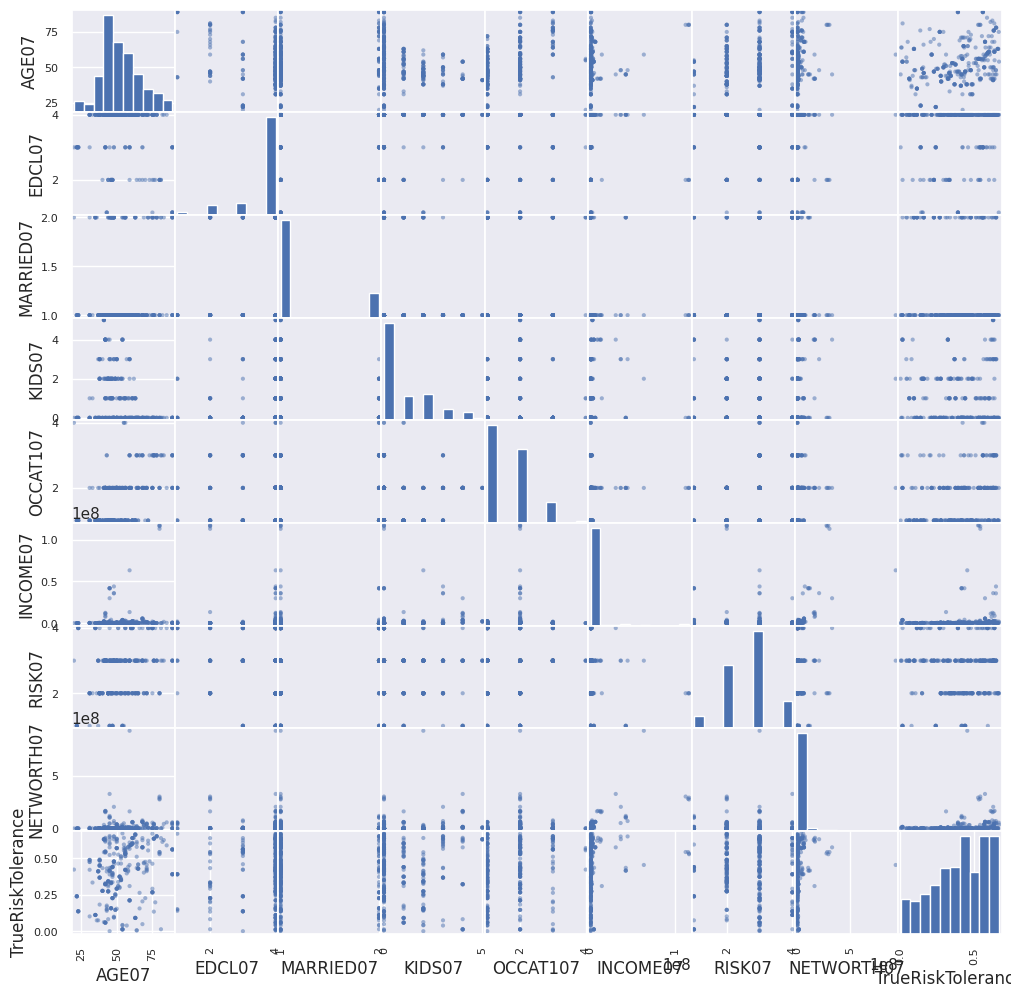

In [109]:
# Create and display a graphic with the correlation results in a scatterplot matrix

from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(dataset3,figsize=(12,12))
plt.show()

Looking at the correlation chart above, networth and income are positively correlated with the risk tolerance.
With more number of kids and marriage the risk tolerance decreases. As the willingness to take risk decreases the risk tolerance decreases. With age there is a positive relationship of the risk tolerance. 

Relative risk aversion decreases as people age (i.e., the proportion of net wealth invested in risky assets increases as people age) when other variables are held constant. Therefore, risk tolerance increases with age. 

In closing, the variables, and their relationship with risk tolerance, seem to align with intuition.

In [110]:
# Save the variables, model, and results. They will be used again in Build Labs b-d

filename = 'build_lab2a.sav' 
dump(dataset3, open(filename, 'wb'))

In [111]:
# Congratulations you have completed Build Lab 2a